In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn.model_selection as ms
from sklearn.model_selection import train_test_split, cross_val_score
import os
from itertools import cycle
from textblob import TextBlob
from nltk.stem import PorterStemmer
from textblob import Word
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing, linear_model, metrics, datasets, multiclass, svm
import seaborn as sns
import numpy.random as nr

## Loading the data



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Opening  file
Data = pd.read_csv("/content/drive/MyDrive/Customer_Complaints_Analysis/complaints.csv")

## Prepare the text

In [ ]:
Data

,Unnamed: 0,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...
...,...,...,...
162416,162416,debt_collection,name
162417,162417,credit_card,name
162418,162418,debt_collection,name
162419,162419,credit_card,name


In [ ]:
#print the column names
list(Data.columns)

['Unnamed: 0', 'product', 'narrative']

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', -1)

<ipython-input-8-defa6ba9722b>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [ ]:
Data

,Unnamed: 0,product,narrative
0,0,credit_card,purchase order day shipping amount receive product week sent followup email exact verbiage paid two day shipping received order company responded im sorry inform due unusually high order volume order shipped several week stock since early due high demand although continuing take order guaranteeing receive order place due time mask order exact shipping date right however guarantee ship soon soon delivers product u getting small shipment shipping first come first served basis appreciate patience fulfill order quickly recommend keeping order lose place line cancel distributor stock moment prefer cancel please note ask via email cancel accordance cancellation policy agreed checkout electronic inventory online requested order canceled refund issued canceled order sent verification order canceled refunded item particulate respirator refunded subtotal shipping tax total usd visa ending refund called disputed amount stated nothing needed submitted address issue recharged item removing called back dispute amount transaction rebillmerchandiserobert ca purchased thu posted wed purchased appears statement transaction rebill ca u followed see status case submitted documentation showing canceled order supposed submit refund called back speak manager case stated dispute ruled favor charge removed card capital one removed purchase bill purchase adjustmentmerchandiserobert j posted fri purchased appears statement purchase adjustment capital one recharges amount transaction rebillmerchandiserobert j purchased thu posted mon purchased appears statement transaction rebill called capital one requested recharge stated visa ruled case pretended remove purchase knew anything case manager ruling favor
1,1,credit_card,forwarded message date tue subject please investigate comenity bank retailer card scam sent hello name scammed comenity bank credit card provider company childrens place new york forever victoria secret original credit comenity bank lower limit began charge overage fee along late fee began pay close attention card find limit also changed well incurring overage late fee reached company comenity bank stated would change credit limit original limit reached told summit payment account corrected comenity bank credit card impacted credit score plummeted negative status im currently paying price due corruption affected detrimental way debt due company charging overage fee well late fee even initial credit limit fluctuating tremendously company charge major fee account willing correct account nervous said attorney reason im reaching im employee company ruining credit plz help name contact info thank
2,2,retail_banking,forwarded message cc sent friday pdt subject final legal payment well fargo well fargo clearly wrong need look actually opened account see court hearing several different government agency reporting well including branch put open account numerous fraudulent charge debit card connected account clearly due fact well fargo maintain clearly required encryption card keep secure adding damage request small claim lawsuit time take away running business branch required come branch multiple time get fraudulent charge removed actually present strong case proper consumer protection agency well fargo immediately barred issuing account debit card insure agency card adequate prevent fraudulent use also requesting punitive treble damage sum hour take work handle lawsuit along legal cost filing lawsuit county small claim court today well fargo outrageous fraudulent conduct clearly warrant punitive damage also sharing every possible consumer protection agency find would think well fargo enough adverse publicity fraudulent conduct last year introduce small claim suit clearly establishing well fargo established business practice fraud customer ca judge really need reminded might want immediately run bonus payment legal department
3,3,credit_reporting,payment history missing credit report specialized loan s

##Data understanding

In [ ]:
Data.dtypes

Unnamed: 0    int64 
product       object
narrative     object
dtype: object

In [ ]:
pd.notnull(Data['narrative']).value_counts()


True     162411
False    10    
Name: narrative, dtype: int64

In [ ]:
Data = Data[['product','narrative']]
Data = Data[pd.notnull(Data['narrative'])]
Data

,product,narrative
0,credit_card,purchase order day shipping amount receive product week sent followup email exact verbiage paid two day shipping received order company responded im sorry inform due unusually high order volume order shipped several week stock since early due high demand although continuing take order guaranteeing receive order place due time mask order exact shipping date right however guarantee ship soon soon delivers product u getting small shipment shipping first come first served basis appreciate patience fulfill order quickly recommend keeping order lose place line cancel distributor stock moment prefer cancel please note ask via email cancel accordance cancellation policy agreed checkout electronic inventory online requested order canceled refund issued canceled order sent verification order canceled refunded item particulate respirator refunded subtotal shipping tax total usd visa ending refund called disputed amount stated nothing needed submitted address issue recharged item removing called back dispute amount transaction rebillmerchandiserobert ca purchased thu posted wed purchased appears statement transaction rebill ca u followed see status case submitted documentation showing canceled order supposed submit refund called back speak manager case stated dispute ruled favor charge removed card capital one removed purchase bill purchase adjustmentmerchandiserobert j posted fri purchased appears statement purchase adjustment capital one recharges amount transaction rebillmerchandiserobert j purchased thu posted mon purchased appears statement transaction rebill called capital one requested recharge stated visa ruled case pretended remove purchase knew anything case manager ruling favor
1,credit_card,forwarded message date tue subject please investigate comenity bank retailer card scam sent hello name scammed comenity bank credit card provider company childrens place new york forever victoria secret original credit comenity bank lower limit began charge overage fee along late fee began pay close attention card find limit also changed well incurring overage late fee reached company comenity bank stated would change credit limit original limit reached told summit payment account corrected comenity bank credit card impacted credit score plummeted negative status im currently paying price due corruption affected detrimental way debt due company charging overage fee well late fee even initial credit limit fluctuating tremendously company charge major fee account willing correct account nervous said attorney reason im reaching im employee company ruining credit plz help name contact info thank
2,retail_banking,forwarded message cc sent friday pdt subject final legal payment well fargo well fargo clearly wrong need look actually opened account see court hearing several different government agency reporting well including branch put open account numerous fraudulent charge debit card connected account clearly due fact well fargo maintain clearly required encryption card keep secure adding damage request small claim lawsuit time take away running business branch required come branch multiple time get fraudulent charge removed actually present strong case proper consumer protection agency well fargo immediately barred issuing account debit card insure agency card adequate prevent fraudulent use also requesting punitive treble damage sum hour take work handle lawsuit along legal cost filing lawsuit county small claim court today well fargo outrageous fraudulent conduct clearly warrant punitive damage also sharing every possible consumer protection agency find would think well fargo enough adverse publicity fraudulent conduct last year introduce small claim suit clearly establishing well fargo established business practice fraud customer ca judge really need reminded might want immediately run bonus payment legal department
3,credit_reporting,payment history missing credit report specialized loan servicing sl made mi

In [ ]:
Data.shape

(162411, 2)

In [ ]:
# check the distribution of complaint by category
Data.groupby('product').narrative.count()

product
credit_card            15566
credit_reporting       91172
debt_collection        23148
mortgages_and_loans    18990
retail_banking         13535
Name: narrative, dtype: int64

##Splitting the data

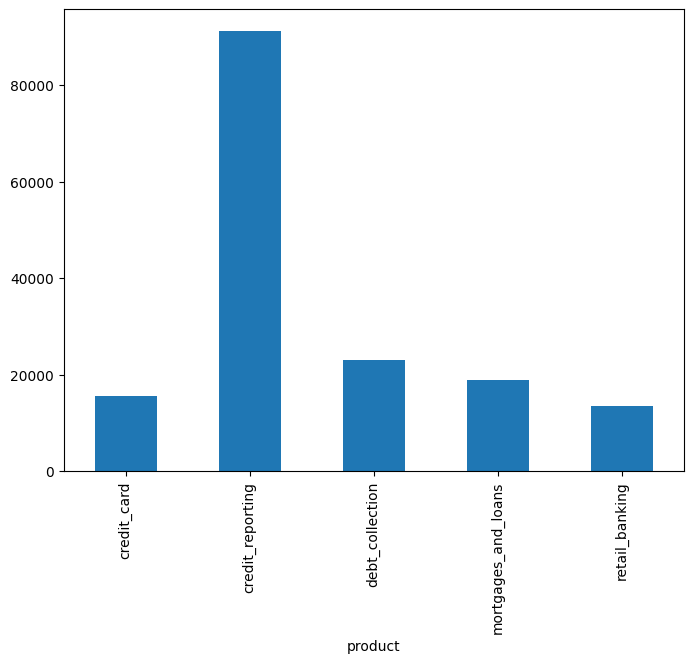

In [ ]:
fig = plt.figure(figsize=(8,6))
Data.groupby('product').narrative.count().plot.bar()
plt.show()

##Converting Text to Features
TF_IDF Vectorizer

In [ ]:
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern='\w{1,}', max_features=5000)    # default {max_df=1.0(float) so its proportion of word contain in all documents,
# simply if a words contain in all the document it is 1.0}, {min_df=1(int) so iteger directly denotes count of words in a document shows atleast 1 word contains in a documents then only it is consider}
tfidf_vect.fit(Data['narrative'])
Features = tfidf_vect.transform(Data['narrative'])

encoder = preprocessing.LabelEncoder()
Labels1 = encoder.fit_transform(Data['product'])

# Binarize the output
#Labels = np.array(preprocessing.label_binarize(Labels, classes=[0,1,2,3,4,5,6,7,8,9,10]))

In [ ]:
print(Features[0], Labels1)

  (0, 4872)	0.06819264629280089
  (0, 4869)	0.07873061600287923
  (0, 4822)	0.06741934174452639
  (0, 4812)	0.10632927317512784
  (0, 4791)	0.03435277328344064
  (0, 4782)	0.035353300237012164
  (0, 4780)	0.07679975322492495
  (0, 4734)	0.06335436096009815
  (0, 4608)	0.06730340458925367
  (0, 4599)	0.03150923871512003
  (0, 4535)	0.1346838081815723
  (0, 4508)	0.03967549931008877
  (0, 4482)	0.019842376923231937
  (0, 4396)	0.043135067827693704
  (0, 4384)	0.03102446652709452
  (0, 4346)	0.04333920645450263
  (0, 4289)	0.06624148754920389
  (0, 4288)	0.044812636742303354
  (0, 4244)	0.13403110283885114
  (0, 4223)	0.03733151718703744
  (0, 4219)	0.09037023824654493
  (0, 4218)	0.09584483578221566
  (0, 4168)	0.039212077478863634
  (0, 4156)	0.05662838639593923
  (0, 4154)	0.07524905374488229
  :	:
  (0, 995)	0.053957634784823655
  (0, 861)	0.021017817267367414
  (0, 837)	0.03906827590048248
  (0, 739)	0.028660827818407796
  (0, 688)	0.13974214385934342
  (0, 667)	0.025332494084235203


In [ ]:
train_x, valid_x,  train_y, valid_y = train_test_split(Data['narrative'],Data['product'])
# Default it will split 25 by 75% means 25% test case and 75% training cases


In [ ]:
train_x

121763    recently conducting monitor credit report discovered item unverifiedinformation victim identity theft section fair credit reporting act requires block fraudulent information credit report resulting identity theft within four business day promptly notify furnisher information fair debt collectionspractices act allowed protect privacy fromthirdparties recall giving permission third partytorelease myinformation toathirdparty notice dispute pursuant fair credit reporting act frca section subsection specific information dispute derogatory nature requesting verification follow reasonable procedure assure maximum possible accuracy information credit report                                                                
117521    continental fin co add hard inquiry credit report per add hard inquiry credit report per add hard inquiry credit report per                                                                                                                                       

In [ ]:
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)
print(train_y)

tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern='\w{1,}', max_features=5000)    # default {max_df=1.0(float) so its proportion of word contain in all documents,

# simply if a words contain in all the document it is 1.0}, {min_df=1(int) so iteger directly denotes count of words in a document shows atleast 1 word contains in a documents then only it is consider}
tfidf_vect.fit(Data['narrative'])

print(tfidf_vect.stop_words)
print(tfidf_vect.vocabulary_)
xtrain_tfidf = tfidf_vect.transform(train_x)

#print(xtrain_tfidf)
xvalid_tfidf = tfidf_vect.transform(valid_x)

[1 1 4 ... 1 1 3]
None
{'purchase': 3464, 'order': 3055, 'day': 1135, 'shipping': 4063, 'amount': 233, 'receive': 3558, 'product': 3393, 'week': 4872, 'sent': 4011, 'email': 1499, 'exact': 1624, 'verbiage': 4780, 'paid': 3117, 'two': 4599, 'received': 3559, 'company': 861, 'responded': 3802, 'im': 2207, 'sorry': 4156, 'inform': 2293, 'due': 1436, 'high': 2106, 'volume': 4822, 'shipped': 4062, 'several': 4041, 'stock': 4244, 'since': 4102, 'early': 1447, 'demand': 1233, 'although': 213, 'continuing': 995, 'take': 4384, 'place': 3241, 'time': 4482, 'mask': 2704, 'date': 1131, 'right': 3863, 'however': 2157, 'guarantee': 2020, 'ship': 4060, 'soon': 4154, 'u': 4608, 'getting': 1963, 'small': 4123, 'shipment': 4061, 'first': 1815, 'come': 837, 'served': 4024, 'basis': 474, 'appreciate': 294, 'patience': 3152, 'fulfill': 1914, 'quickly': 3502, 'recommend': 3573, 'keeping': 2446, 'lose': 2621, 'line': 2568, 'cancel': 650, 'moment': 2835, 'prefer': 3318, 'please': 3262, 'note': 2961, 'ask': 34

In [ ]:
help(TfidfVectorizer)

Help on class TfidfVectorizer in module sklearn.feature_extraction.text:

class TfidfVectorizer(CountVectorizer)
 |  TfidfVectorizer(*, input='content', encoding='utf-8', decode_error='strict', strip_accents=None, lowercase=True, preprocessor=None, tokenizer=None, analyzer='word', stop_words=None, token_pattern='(?u)\\b\\w\\w+\\b', ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None, vocabulary=None, binary=False, dtype=<class 'numpy.float64'>, norm='l2', use_idf=True, smooth_idf=True, sublinear_tf=False)
 |  
 |  Convert a collection of raw documents to a matrix of TF-IDF features.
 |  
 |  Equivalent to :class:`CountVectorizer` followed by
 |  :class:`TfidfTransformer`.
 |  
 |  Read more in the :ref:`User Guide <text_feature_extraction>`.
 |  
 |  Parameters
 |  ----------
 |  input : {'filename', 'file', 'content'}, default='content'
 |      - If `'filename'`, the sequence passed as an argument to fit is
 |        expected to be a list of filenames that need reading to fetc

##Model building

In [ ]:
print(xtrain_tfidf[0])


  (0, 4934)	0.08961563701773077
  (0, 4794)	0.09261448708771122
  (0, 4782)	0.10014061393069902
  (0, 4452)	0.120737711132981
  (0, 4437)	0.16644872494310575
  (0, 4298)	0.14645847599509645
  (0, 4176)	0.13469551525326248
  (0, 3978)	0.18936900898872508
  (0, 3823)	0.13809385610665964
  (0, 3765)	0.13985035318421518
  (0, 3761)	0.09417665037856486
  (0, 3744)	0.1263799470316608
  (0, 3741)	0.1325754006593
  (0, 3564)	0.10348154387442074
  (0, 3553)	0.15921350745696472
  (0, 3544)	0.13483812730822
  (0, 3476)	0.11935122410236709
  (0, 3429)	0.14270280428253587
  (0, 3418)	0.12396542227525786
  (0, 3380)	0.13096464944034517
  (0, 3371)	0.1420394219096181
  (0, 3296)	0.10098250170777165
  (0, 3204)	0.12704835309046786
  (0, 2971)	0.12596614663754024
  (0, 2964)	0.0935147376108171
  :	:
  (0, 2842)	0.1795804174858906
  (0, 2721)	0.16562326324727594
  (0, 2410)	0.07441648001632702
  (0, 2294)	0.21688902020023051
  (0, 2190)	0.15357674181464717
  (0, 1969)	0.12775695305272253
  (0, 1929)	0.1

In [ ]:
model = linear_model.LogisticRegression().fit(xtrain_tfidf, train_y)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
model


LogisticRegression()

##Model Evaluation

In [ ]:
def accuracy():
    # checking accuracy
    accuracy = metrics.accuracy_score(model.predict(xvalid_tfidf),valid_y)
    print("Accuracy: ",accuracy)
    print(metrics.classification_report(valid_y,model.predict(xvalid_tfidf), target_names=Data['product'].unique()))

accuracy()

Accuracy:  0.868925941432899
                     precision    recall  f1-score   support

        credit_card       0.79      0.77      0.78      3955
     retail_banking       0.90      0.93      0.92     22751
   credit_reporting       0.81      0.72      0.76      5879
mortgages_and_loans       0.84      0.83      0.83      4630
    debt_collection       0.86      0.88      0.87      3388

           accuracy                           0.87     40603
          macro avg       0.84      0.83      0.83     40603
       weighted avg       0.87      0.87      0.87     40603



The model's **86.89% accuracy** demonstrates its capability to accurately categorize instances across a wide range of financial service categories. The model demonstrates exceptional performance in retail banking recognition, attaining a 90% precision rate and a 93% recall rate. Additional sectors that exhibit commendable performance include credit cards, mortgages and loans, and debt collection. The precision of these sectors ranges from 79% to 86%, while the recall falls within the range of 72% to 88%. In general, the weighted average F1-score of 0.87 obtained for the model indicates its strong capability to classify various financial services.


Let's Analyse the correctly classified and misclassified data closely by heatmap structure and confusion matrix.

[[ 3064   451    91    69   280]
 [  361 21174   746   405    65]
 [  154  1230  4243   197    55]
 [   85   485   139  3828    93]
 [  225    92    35    64  2972]]


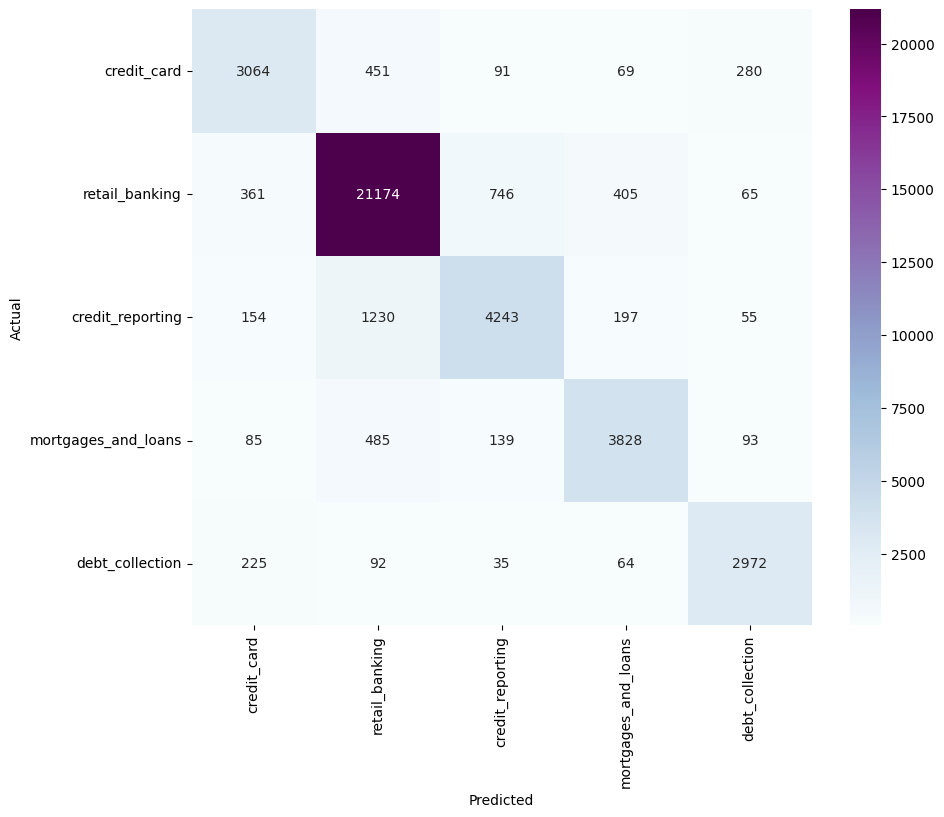

In [ ]:
def heat_conf():
    # confusion matrix
    conf_mat = metrics.confusion_matrix(valid_y,model.predict(xvalid_tfidf))
    print(conf_mat)
    # visualizing confusion matrix

    fig, ax = plt.subplots(figsize=(10,8))
    sns.heatmap(conf_mat, annot=True,fmt='d',cmap='BuPu',xticklabels=Data['product'].unique(),yticklabels=Data['product'].unique())
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

heat_conf()

In [ ]:
category_id_df = pd.DataFrame()
category_id_df['category'] = Data['product'].unique()
category_id_df['category_id'] = category_id_df.index.values

#print(category_id_df.index.values)
category_to_id = dict(category_id_df[['category_id','category']].values)
category_to_id

{0: 'credit_card',
 1: 'retail_banking',
 2: 'credit_reporting',
 3: 'mortgages_and_loans',
 4: 'debt_collection'}

In [ ]:
probabilities = model.predict_proba(xvalid_tfidf)
print(probabilities[:15,:])

[[3.53845255e-02 4.30501091e-01 7.78398470e-02 4.35050466e-01
  2.12240705e-02]
 [5.74779913e-01 6.19396513e-02 3.04036057e-01 2.54842226e-02
  3.37601560e-02]
 [1.04173767e-03 9.92830298e-01 4.46646999e-03 1.36168538e-03
  2.99809129e-04]
 [2.38474235e-02 5.45485063e-02 6.68784142e-03 7.09642470e-03
  9.07819804e-01]
 [9.11402850e-04 9.97397298e-01 1.49643942e-03 1.63756876e-04
  3.11024177e-05]
 [1.26881504e-04 9.89443578e-01 1.03727384e-02 4.71630144e-05
  9.63888103e-06]
 [5.50523609e-05 5.57217049e-01 7.48249985e-04 4.41914202e-01
  6.54469680e-05]
 [9.63273655e-01 1.87721619e-02 6.59085653e-03 2.00117148e-03
  9.36215486e-03]
 [1.52582816e-03 9.91481377e-01 5.33113884e-03 1.09411159e-03
  5.67544398e-04]
 [1.00403455e-02 9.83432295e-01 6.41489109e-03 3.86834970e-05
  7.37848462e-05]
 [5.04666417e-03 9.79629620e-01 5.89048323e-03 1.83075472e-03
  7.60247742e-03]
 [2.12142010e-02 9.44643267e-01 3.10557757e-02 3.04642046e-03
  4.03355495e-05]
 [1.70373435e-03 9.88431025e-01 9.323310

In [ ]:
y_score = model.decision_function(xvalid_tfidf)
print(y_score[:15,:])
predictions = model.predict(xvalid_tfidf)
print(predictions[:15])

[[-1.05702059  1.44165468 -0.26864171  1.45216686 -1.56815924]
 [ 1.76306023 -0.46476643  1.12621933 -1.35286744 -1.07164569]
 [-1.46754229  5.3921273  -0.01183406 -1.19970926 -2.71304169]
 [-0.39666275  0.4307514  -1.66804777 -1.60874784  3.24270697]
 [-0.47989534  6.51802412  0.0159635  -2.19649748 -3.85759479]
 [-1.95964698  7.00199742  2.44403574 -2.94929061 -4.53709557]
 [-4.19908389  5.02334148 -1.58963151  4.79150239 -4.02612847]
 [ 3.94657672  0.0086142  -1.03807751 -2.23002807 -0.68708534]
 [-1.28122444  5.19543841 -0.03019687 -1.61381906 -2.27019805]
 [ 1.26714388  5.85158115  0.81915437 -4.29180985 -3.64606955]
 [-0.96376104  4.30468606 -0.80915047 -1.97776021 -0.55401434]
 [ 0.80572918  4.60186572  1.18684317 -1.13497435 -5.45946371]
 [-0.81591485  5.54738149  0.88378039 -2.24000755 -3.37523948]
 [ 2.34970217  0.06466173 -1.65265057  1.02627143 -1.78798475]
 [ 0.40031657  4.1715593   0.14264214 -2.24120696 -2.47331105]]
[3 0 1 4 1 1 1 0 1 1 1 1 1 0 1]


In [ ]:
# Binarize the output
y = preprocessing.label_binarize(valid_y, classes=[0,1,2,3,4,5,6,7,8,9,10])
n_classes = y.shape[1]
y

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

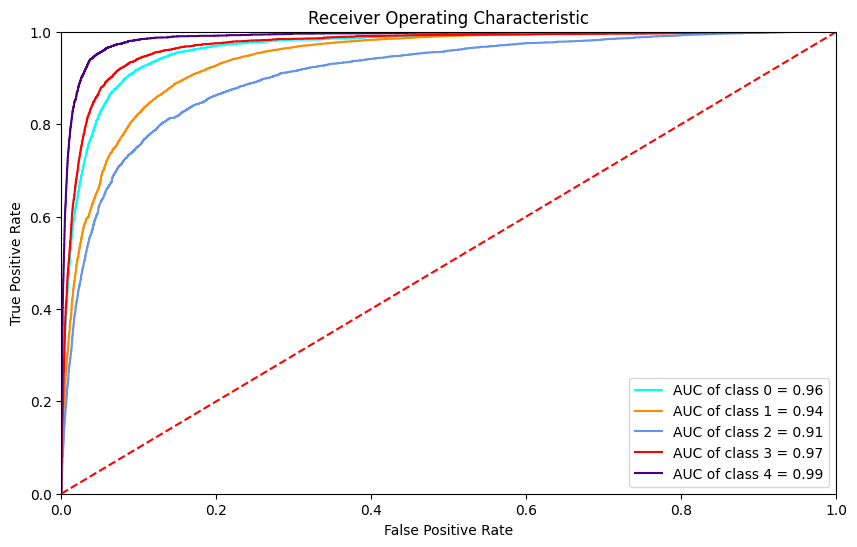

In [ ]:
def plot_auc(labels, colours=['orange']):

    # Compute ROC curve and ROC area for each class
    n_classes = len(category_to_id)
    # print(n_classes)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC

    for i in range(n_classes):
        fpr[i], tpr[i], _ = metrics.roc_curve(y[:,i], y_score[:, i])
    #     print(fpr[i], tpr[i])
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])

    plt.figure(figsize=(10,6))
    for i, color in zip(range(n_classes), colours):
        plt.plot(fpr[i], tpr[i], color = color, label = 'AUC of class {0} = {1:0.2f}'.format(i,roc_auc[i]))

    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

colours = ['aqua', 'darkorange', 'cornflowerblue','r','indigo','darkmagenta','green','brown','olive','darkcyan','violet']
plot_auc(y, colours)    # in place of probabilities we can put y_score of decision function as well. will get a same result.

The previous graph depicts the classified ROC curves in distinct hues. Legends indicate that all the AUDs are significantly higher and accurately classify consumer complaints, with the majority of values exceeding 0.95 with a few exceptions for 0.85. This curve demonstrates that we have constructed an exemplary model that satisfies the majority of correctly classified complaints.



##Let's Analyse the Model by User's Input

In [ ]:

user_text = input("Enter your text: ")

# Transform the user's input into features using TF-IDF vectorizer
user_features = tfidf_vect.transform([user_text])

# Use the trained model to predict the category
predicted_category = model.predict(user_features)

# Map the predicted category label back to the original category name
predicted_category_name = encoder.inverse_transform(predicted_category)

# Display the predicted category to the user
print("Predicted category:", predicted_category_name)


Enter your text: collection account acct opened balance account acct opened balance account
Predicted category: ['credit_reporting']


##Conclusion
We improved the project's accessibility and usability by combining user input and real-time prediction capabilities. Users can now immediately decide the category of their consumer complaint, providing them with useful information and support.